## **Análisis del P300-Dataset & DrugSignal.py**  

#### 02/Dic/16h

https://www.kaggle.com/datasets/rramele/p300samplingdataset  
  
Docente: Rodrigo Ramele | rramele@itba.edu.ar  
Estudiante: Alexander Chavez | achavezmontano@itba.edu.ar  


#### 0. Información introductoria
- ERPs (Event-related potential):   
Respuesta positiva: P300 (300ms | 5uV), P600 (600ms | 4uV)  
Respuesta negativa: ERN(200ms | 3,75uV), N400 (400ms | 5uV)  
Los tiempos indican el delay cuando el ERP ocurre después del evento.
Son de baja amplitud.

- *MNE: Open-source Python package for exploring, visualizing, and analyzing human neurophysiological data: MEG, EEG, sEEG, ECoG, NIRS, and more.*
*The function loadmat loads all variables stored in the MAT-file into a simple Python data structure, using only Python’s dict and list objects.* 
*Numeric and cell arrays are converted to row-ordered nested lists. Arrays are squeezed to eliminate arrays with only one element.* 
*The resulting data structure is composed of simple types that are compatible with the JSON format.*

- Paradigma de Oddball: https://en.wikipedia.org/wiki/Oddball_paradigm

- EEG -> Estocástica, no estacionaria, multicanal.


#### 1. Instalar e importar librerías

In [1]:
import mne                                                              # pip install mne
mne.set_log_level('WARNING')                                            # Luego averiguar ¿para qué?
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb                                                    # Por ahora lo voy a usar para cambiar los nombres de las columnas
color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']     # Paleta de colores para diferenciar las ondas

import a_funciones as a_fun  

#### 1.1 Algunas variables

In [8]:
xlabel = 'Muestra'
ylabel = 'Amplitud (uV)'

#### 1.2 Funciones

In [2]:
def grafico1(data_frame, titulo, xlabel, ylabel, dir_savefig):          # Función para graficar los ocho canales. Con 'index'
    plt.figure(figsize=(30,8))                                          # Se usa para signal, tirals o flash, que vienen de mat['data'][0][0][X] 
    axes = plt.gca()
    for i in range(0,7):
        plt.plot(data_frame['index'], data_frame[i], color[i])
    axes.set_title(titulo)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.title.set_size(30)
    axes.xaxis.label.set_size(20)
    axes.yaxis.label.set_size(20)
    plt.axis((0,350000,-1700,2000))                                     #plt.axis((eje_ploteo))
    plt.grid()
    plt.savefig(dir_savefig)
    plt.show()
    return()   

def grafico2(data_frame, titulo, xlabel, ylabel, dir_savefig):          # Función para graficar los ocho canales. Con 'Sample'
    plt.figure(figsize=(30,8))                                          # Se usa para erptemplate, que es mat['routput'].
    axes = plt.gca()                                                    # Revisar ¿por qué?
    for i in range(0,7):
        plt.plot(data_frame['sample'], data_frame[i], color[i])
    axes.set_title(titulo)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.title.set_size(30)
    axes.xaxis.label.set_size(20)
    axes.yaxis.label.set_size(20)
    plt.axis((0,250,-4,7))                                              #plt.axis((eje_ploteo))
    plt.grid()
    plt.savefig(dir_savefig)
    plt.show()
    return()   

# Randomize amplitude and jitter.
# Find the right locations where this should be inserted in the stream.
# Insert the signal mantaining the continiuity of the EEG.
def DrugSignal(signal, t_flash):
    '''
    Randomize amplitude and jitter
    Find the right locations where this should be inserted in the stream
    Insert the template mantaining the continuity and physiological meaning of the EEG
    '''
    for i in range(0,4200):
        if (t_flash[i,3]==2):
            signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)

    return signal

# La función DrugSignal_ALEX la utilizo para testear cambios. 
def DrugSignal_ALEX(signal, t_flash):
    '''
    Randomize amplitude and jitter
    Find the right locations where this should be inserted in the stream
    Insert the template mantaining the continuity and physiological meaning of the EEG
    '''
    for i in range(0,4200):
        if (t_flash[i,3]==2):
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)
            signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)
    return signal

#### 2. Carga de archivos
Se cargan tres señales, una modelo y dos ERPs de pacientes de 29 años, hombres.  
Para el caso del ERPTemplate ahí está la info de los canales.  
Para los archivos P300S04 y P300S07 es distinto.  
El archivo .mat contiene una estructura de datos cuya info importante para éste trabajo es el 'routput'.  


In [14]:
# First load the template.  This is the signal that will be used to DRUG the basal EEG stream.
ERPTemplate = scipy.io.loadmat('./dataset/ERPTemplate.mat') 
p300subject25 = scipy.io.loadmat('./dataset/p300-subject-25.mat')
P300S04 = scipy.io.loadmat('./dataset/P300S04.mat')       

#### 2.1. Revisión de la estructura de datos de P300S04.mat
Son levemente distintas al ERPTemplate.mat  
  
'header' -> Info general del MAT-file.  
'version' -> 1.0.  
'globals' -> Vacío.  
  
'channelRange' -> Un array con los 8 canales. Si los querés tratar, los separás en un df.  
'Fs' > La Fs, frecuencua de muestreo: 250.  
'Trials' -> Sample point where each of the 35 trials starts. (HAY QUE REPASAR ESTO)  
'stims' -> 21482 rows × 3 columns, data.y_stim: Stimulation number: 1-6 rows, 7-12 cols.  
'channelNames' -> Etiqueta de cada uno de los 8 canales: # [FZ]	[CZ] [P3] [PZ] [P4]	[PO7] [PO8]	[OZ]  
'sampleTime' -> 355872 rows × 1 columns, (NO SE QUE ES)  
'samples' -> Acá hay una señal, no es un P300 como tal pero está.  
'Word'  
'data' -> El [0][0][0] lo usa Rodrigo para trabajar mas adelante.

In [15]:
#df_mat4_channelRange = pd.DataFrame(mat4['channelRange'])
#df_mat4_Fs = pd.DataFrame(mat4['Fs'])
#df_mat4_Trials = pd.DataFrame(mat4['Trials'])
#df_mat4_stims = pd.DataFrame(mat4['stims'])
#df_mat4_channelNames = pd.DataFrame(mat4['channelNames'])
#df_mat4_sampleTime = pd.DataFrame(mat4['sampleTime'])
#df_mat4_subject = pd.DataFrame(mat4['subject'])

df_mat4_samples = pd.DataFrame(P300S04['samples'])
df_mat4_data = pd.DataFrame(P300S04['data'][0][0][0])                          # Es igual -> signal = mat['data'][0][0][0]           

df_mat4_samples['index'] = df_mat4_samples.index
df_mat4_data['index'] = df_mat4_data.index

df_mat4_samples['sample'] = df_mat4_samples.index
df_mat4_data['sample'] = df_mat4_data.index

channelNames = ['FZ', 'CZ', 'P3', 'PZ', 'P4', 'P07', 'PO8', 'OZ','index']
#df_mat4_data.columns = ['FZ', 'CZ', 'P3', 'PZ', 'P4', 'P07', 'PO8', 'OZ'] #(OJO, SI LO AGREGO NO HACE EL FOR ABAJO)
#df_mat4_samples.columns = ['FZ', 'CZ', 'P3', 'PZ', 'P4', 'P07', 'PO8', 'OZ'] #(OJO, SI LO AGREGO NO HACE EL FOR ABAJO)

In [17]:
df_mat4_data

,0,1,2,3,4,5,6,7,index,sample
0,15.803187,15.668056,0.450748,-0.246739,19.330097,-1.132737,10.837735,-1.712235,0,0
1,17.145462,16.044989,0.586553,-0.498909,19.659731,-0.112840,14.171951,0.048915,1,1
2,17.133789,15.164561,0.738886,-0.643848,18.769503,0.912598,16.634453,1.896414,2,2
3,16.094910,13.683571,0.718980,-0.865788,16.467941,1.378444,15.890626,2.440898,3,3
4,14.610955,12.358287,0.554420,-1.064819,13.150882,1.031192,11.258953,0.767299,4,4
...,...,...,...,...,...,...,...,...,...,...
355867,-8.528163,-3.364779,-6.448086,-5.422574,4.428365,-5.035928,2.488521,1.043489,355867,355867
355868,-10.551258,-7.601985,-9.898625,-8.508256,0.539098,-7.744183,0.652634,0.044640,355868,355868
355869,-11.353694,-10.848045,-12.209644,-10.603199,-3.229153,-9.379116,-1.076911,-0.710857,355869,355869
355870,-11.167764,-13.216138,-13.787462,-12.053395,-6.661563,-10.260121,-2.546618,-1.289687,355870,355870


#### 2.2. Grafico todo 'samples', o 'data' en una misma imagen:

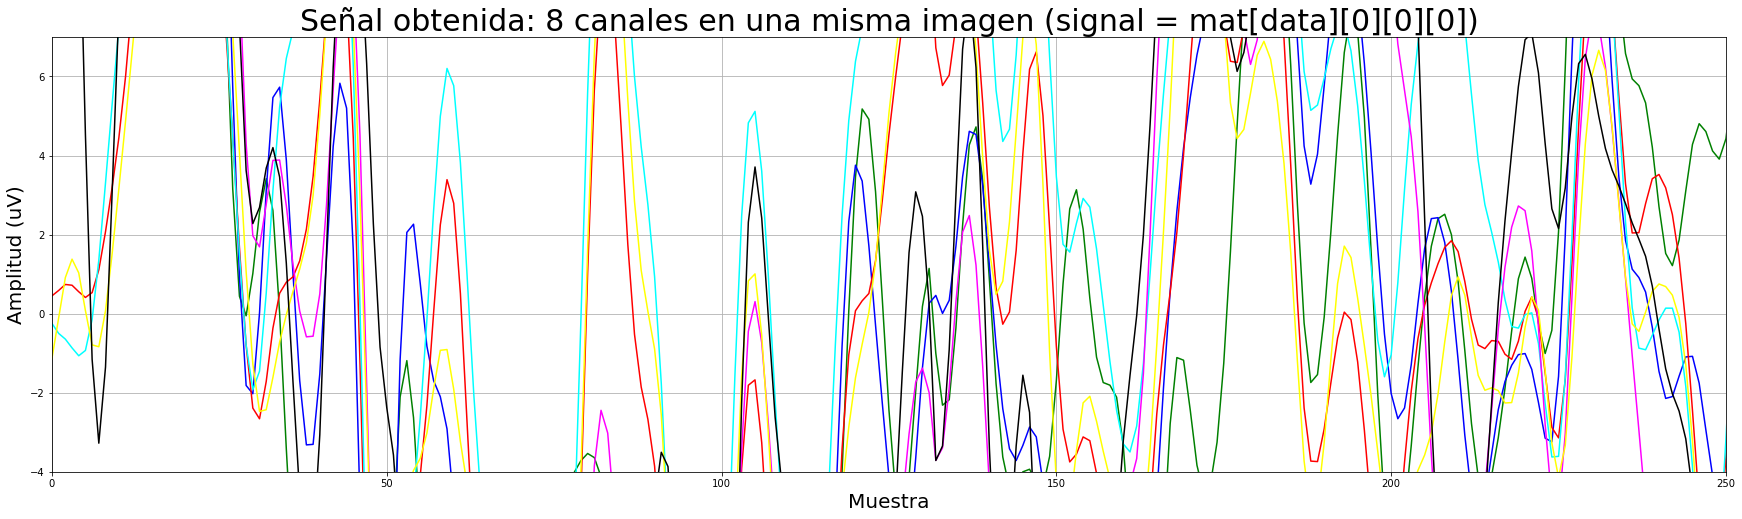

()

In [18]:
data_frame = df_mat4_data

titulo = 'Señal obtenida: 8 canales en una misma imagen (signal = mat[data][0][0][0])'
dir_savefig = "./images_alex/01 - P300S04_8Ch.jpg"
a_fun.grafic_8ch(data_frame, titulo, xlabel, ylabel, dir_savefig)

canalFZ = 0
titulo = 'Señal obtenida, canal FZ'
dir_savefig = "./images_alex/02 - P300S04_ChFZ.jpg"
a_fun.grafic_1ch(data_frame, titulo, xlabel, ylabel, dir_savefig, canalFZ)

canalCZ = 1
titulo = 'Señal obtenida, canal CZ'
dir_savefig = "./images_alex/03- P300S04_ChCZ.jpg"
a_fun.grafic_1ch(data_frame, titulo, xlabel, ylabel, dir_savefig, canalCZ)

canalP3 = 2
titulo = 'Señal obtenida, canal P3'
dir_savefig = "./images_alex/04- P300S04_ChP3.jpg"
a_fun.grafic_1ch(data_frame, titulo, xlabel, ylabel, dir_savefig, canalP3)

df_mat4_data.describe()


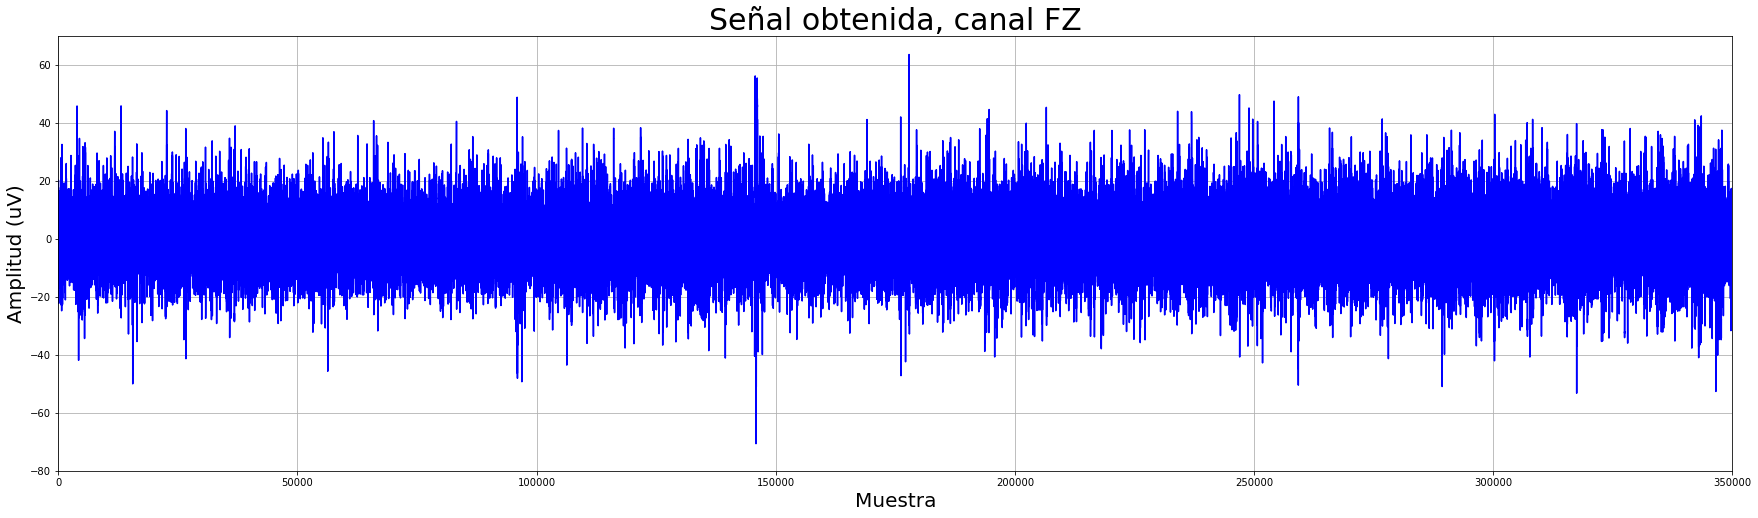

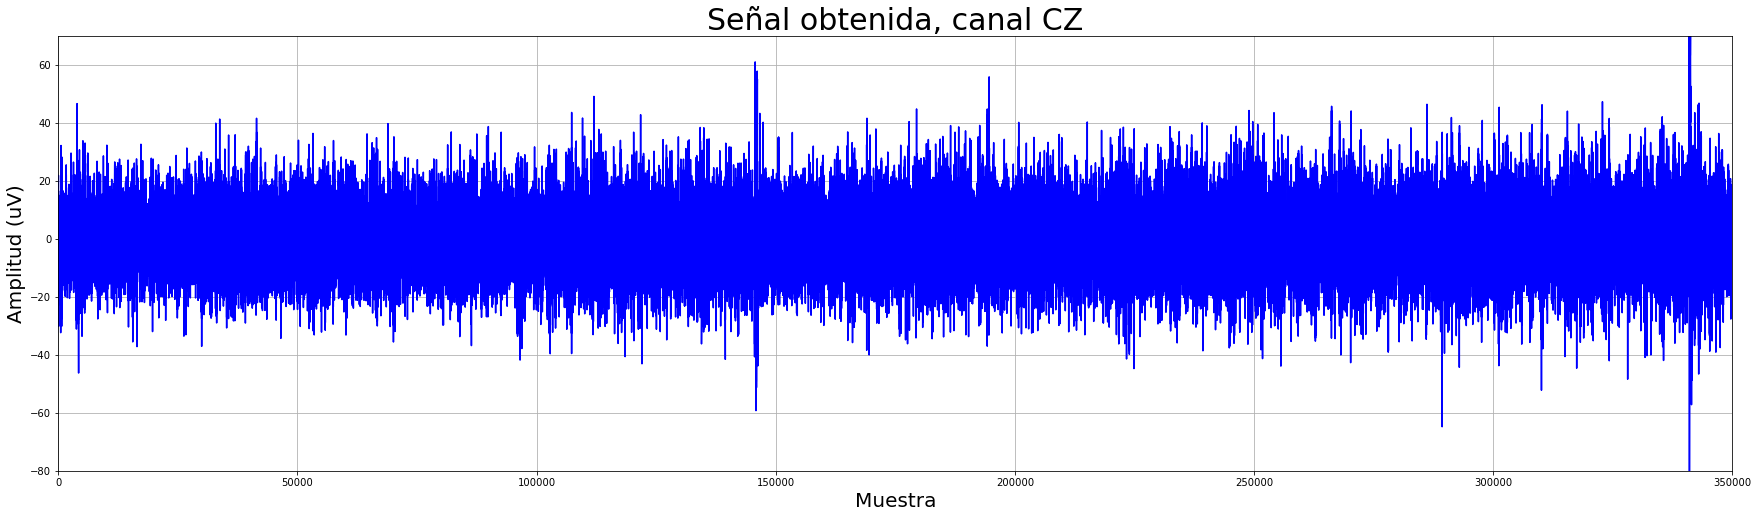

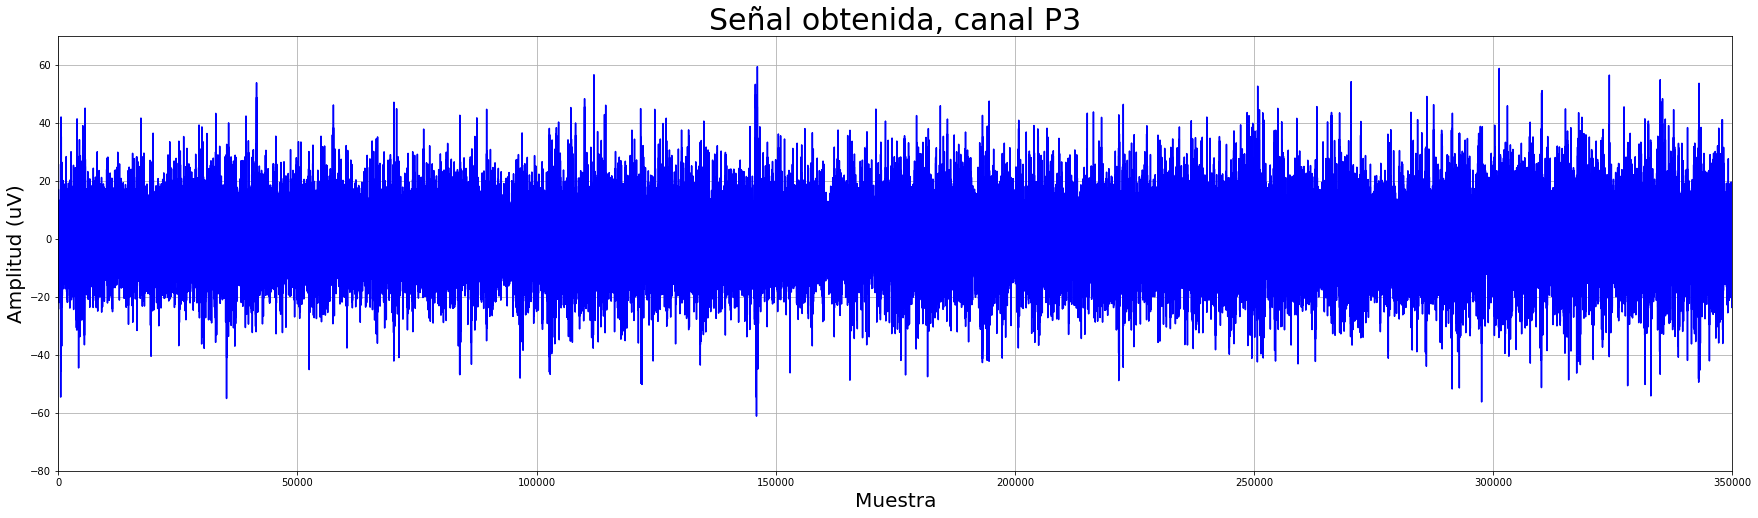

,0,1,2,3,4,5,6,7,index
count,355872.000000,355872.000000,355872.000000,355872.000000,355872.000000,355872.000000,355872.000000,355872.000000,355872.000000
mean,0.000836,-0.000006,0.000553,0.002417,-0.000547,0.000525,0.011254,-0.000133,177935.500000
std,9.943149,11.074504,10.997419,11.179263,10.862208,10.032820,40.343403,8.228174,102731.541836
min,-70.646057,-137.649551,-61.142323,-61.047009,-91.708542,-78.050255,-1514.828491,-67.566948,0.000000
25%,-6.355463,-7.009691,-7.123110,-7.234213,-6.735395,-6.481792,-5.128433,-5.322606,88967.750000
50%,-0.054990,-0.038295,-0.134003,-0.096321,-0.080122,-0.163862,-0.188941,-0.370402,177935.500000
75%,6.362632,6.894224,6.991487,7.111699,6.670920,6.266195,4.888881,4.788723,266903.250000
max,63.589142,258.674927,59.404602,60.456150,128.368011,77.115242,1780.421020,91.254089,355871.000000


#### 2.3. Revisión de la estructura de datos de ERPTemplate.mat
ERPTemplate.mat NO contiene toda la información de P300S04.mat,  
sólo un encabezado similar:  
    'header' -> Info general del MAT-file.  
    'version' -> 1.0.  
    'globals' -> Vacío.  
y el 'routput' que es la salida.

In [ ]:
print("1. Encabezado : ", sorted(mat))                                      #Informativo
print("2. Tipo : ", type(mat))

In [ ]:
routput = mat['routput']
print("routput")
print("1. Tipo : ", type(routput))
print("2. ¿Cómo deben leerse? : ", routput.dtype) 
# dtype describes how the bytes in the fixed-size block of memory corresponding to an array item should be interpreted.
print("3. Tamaño: ", routput.size)
print("4. Forma:", routput.shape)

# In this ERPTemplate, there are two different template signals that are good.
erptemplate1 = routput[0][7][0][1][0][0][0][7] 
erptemplate2 = routput[0][7][0][1][0][0][0][0]

# The original ERPTemplate dataset has a sampling frequency of 256 so I need to perform a small downsampling to 250 Hz
erptemplate1 = np.delete( erptemplate1, range(0,256,43),0)
erptemplate2 = np.delete( erptemplate2, range(0,256,43),0)

#### 2.4. Acá los transformo en datasets y los grafico para ir siguiendo lo que contienen

In [ ]:
df_erptemplate1 = to_df(erptemplate1)
df_erptemplate2 = to_df(erptemplate2)

data_frame = df_erptemplate1
titulo = 'Señal obtenida, Event-related potential1: 8 canales en una misma imagen'
dir_savefig = "./images_alex/05 - ERPTemplate01.jpg"
grafico2(data_frame, titulo, xlabel, ylabel, dir_savefig)

data_frame = df_erptemplate2
titulo = 'Señal obtenida, Event-related potential2: 8 canales en una misma imagen'
dir_savefig = "./images_alex/06 - ERPTemplate02.jpg.jpg"
grafico2(data_frame, titulo, xlabel, ylabel, dir_savefig)

=============================================================================================================
# ACÁ VOY
=============================================================================================================


In [ ]:
# Use this for testing  (get a ZERO signal)
erptemplate_zeros = np.zeros((250,8))
#erptemplate_zeros
#df_erptemplate_zeros = pd.DataFrame(erptemplate_zeros)
#df_erptemplate1['sample'] = df_erptemplate_alex.index
#df_erptemplate_zeros.head(3)

In [ ]:
# Now load the basal EEG stream
mat = scipy.io.loadmat('./dataset/p300-subject-25.mat')
# Lo cargo a mi manera:
mat25 = scipy.io.loadmat('./dataset/p300-subject-25.mat')
#mat = scipy.io.loadmat('./dataset/p300-subject-26.mat')
#mat = scipy.io.loadmat('/Users/rramele/./GoogleDrive/Data/P300/p300-subject-21.mat')
#mat = scipy.io.loadmat('/Users/rramele/./GoogleDrive/Data/P300/p300-subject-06.mat')
#mat

*Basal EEG activity: the EEG is the compound summation of myriads of electrical sources from
the CNS. These sources generate a baseline EEG which shows continuous activity with a small or
null relation with any concurrent cognitive activity or task.*

In [ ]:
# coding: latin-1
# Data point zero for the eight channels.  Should be in V.
signal = mat['data'][0][0][0]
signal_original = mat['data'][0][0][0]
df_mat25_data = pd.DataFrame(mat25['data'][0][0][0]) 

#* pow(10,6)

In [ ]:
df_mat25_data['sample'] = df_mat25_data.index
df_mat25_data.head(3)

In [ ]:
df_signal_original = to_df(signal_original) 
#df_signal_original.describe()

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_signal_original['sample'], df_signal_original[0], color[1])
plt.xlim([0,70000])
plt.ylim([-200,250]);
plt.grid(), plt.show()

In [ ]:
plt.figure(figsize=(30,8))
for i in range(0,6):
    plt.plot(df_mat25_data['sample'], df_mat25_data[i], color[i])
plt.grid()
plt.savefig("07 - P300-subject-25.jpg")
plt.show()

In [ ]:
plt.figure(figsize=(30,8))
axes = plt.gca()
for i in range(0,6):
    plt.plot(df_mat25_data['sample'], df_mat25_data[i], color[i])
plt.ylim([-7000, 5000]);
plt.xlim([225000,240000])
plt.grid()
plt.savefig("08 - p300-subject-25-WINDOW01.jpg")
plt.show()

In [ ]:
plt.figure(figsize=(30,8))
axes = plt.gca()
for i in range(0,6):
    plt.plot(df_mat25_data['sample'], df_mat25_data[i], color[i])
plt.ylim([-500, 500]);
plt.xlim([236000,238000])
plt.grid()
plt.savefig("04 - p300-subject-25-WINDOW02.jpg")
plt.show()

### *data.trial: Sample point where each of the 35 trials starts.*

https://www.kaggle.com/datasets/rramele/p300samplingdataset

In [ ]:
# Trials
t_trials = mat['data'][0][0][3]
t_trials

In [ ]:
df_t_trials = pd.DataFrame(t_trials)
#df_t_trials['sample'] = df_signal.index
df_t_trials.head(3)

In [ ]:
df_t_trials = pd.DataFrame(t_trials)
df_t_trials = df_t_trials.transpose()
df_t_trials['sample'] = df_t_trials.index
df_t_trials.head()
plt.figure(figsize=(30,8))
plt.plot(df_t_trials['sample'], df_t_trials[0])
plt.grid(), plt.show()

### *data.flash: Sample point where each flashing starts (sample point id, duration, stimulation, hit/nohit)* 
data.flash: punto de muestra donde comienza cada parpadeo (identificación del punto de muestra, duración, estimulación, hit/nohit)  
Nota: En la función DrugSignal sólo usa el canal 0 y el 3. Por ahora los otros canales no me interesan.

https://www.kaggle.com/datasets/rramele/p300samplingdataset

In [ ]:
# Flash matrix
t_flash = mat['data'][0][0][4]
#t_flash
df_t_flash = to_df(t_flash)
df_t_flash.head(5)

In [ ]:
df_t_flash.describe()

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_t_flash['sample'], df_t_flash[0])
plt.xlim([0,500])
plt.ylim([0,50000]);
plt.grid(), plt.show()

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_t_flash['sample'], df_t_flash[3])
plt.xlim([0,500])
plt.ylim([0.9,2.1]);
plt.grid(), plt.show()

In [ ]:
signal_ALEX2 = to_df(signal)
signal_ALEX2.head(10)

In [ ]:
DrugSignal_ALEX = DrugSignal_ALEX(signal, t_flash)
df_DrugSignal_ALEX = to_df(DrugSignal_ALEX)
df_DrugSignal_ALEX.head(20)
#df_signal_ALEX.describe()

In [ ]:
plt.figure(figsize=(30,8))
for i in range(0,6):
    plt.plot(df_DrugSignal_ALEX['sample'], df_DrugSignal_ALEX[i], color[i])
plt.grid(), plt.show()

In [ ]:
plt.figure(figsize=(30,8))
for i in range(0,6):
    plt.plot(df_signal_original['sample'], df_signal_original[i], color[i])
plt.grid(), plt.show()

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_DrugSignal_ALEX['sample'], df_DrugSignal_ALEX[0], color[2])
plt.xlim([0,70000])
plt.ylim([-200,250]);
plt.grid(), plt.show()

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_signal_original['sample'], df_signal_original[0], color[1])
plt.xlim([0,70000])
plt.ylim([-200,250]);
plt.grid(), plt.show()

=================================================================================================================

=================================================================================================================

=================================================================================================================

=================================================================================================================

=================================================================================================================